<a href="https://colab.research.google.com/github/PanchitaWallatri/Data-ana/blob/main/CE_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libs

In [ ]:
import numpy as np
import pandas as pd
import io

##GD with 1x

In [ ]:
csvdat="""
x	y
1	4
2	7
3	10
4	13
"""

In [ ]:
df=pd.read_csv(io.StringIO(csvdat),sep="\t")

In [ ]:
df

,x,y
0,1,4
1,2,7
2,3,10
3,4,13


In [ ]:
x=df['x']
x

0    1
1    2
2    3
3    4
Name: x, dtype: int64

In [ ]:
y=df['y']
y

0     4
1     7
2    10
3    13
Name: y, dtype: int64

In [ ]:
w=0 #random
alpha=0.1 #defined by developer an AI engineer

In [ ]:
for i_epoch in range(0,10):
  y_pred = w*x
  gw = ((y_pred-y)*x).mean()
  w = w - alpha*gw
  rmse=np.sqrt(((y_pred-y)**2).mean())

  print('(', i_epoch, ')  w =',w,' , rmse =',rmse)

( 0 )  w = 2.5  , rmse = 9.137833441248533
( 1 )  w = 3.125  , rmse = 2.318404623873926
( 2 )  w = 3.28125  , rmse = 0.701560760020114
( 3 )  w = 3.3203125  , rmse = 0.432448515721814
( 4 )  w = 3.330078125  , rmse = 0.40980267498135614
( 5 )  w = 3.33251953125  , rmse = 0.40834561284084736
( 6 )  w = 3.3331298828125  , rmse = 0.4082543737921223
( 7 )  w = 3.333282470703125  , rmse = 0.4082486706745349
( 8 )  w = 3.3333206176757812  , rmse = 0.4082483142270404
( 9 )  w = 3.3333301544189453  , rmse = 0.40824829194906165


##GD with 1x+bias

In [ ]:
csvdat="""
x	y
1	4
2	7
3	10
4	13
"""

In [ ]:
df=pd.read_csv(io.StringIO(csvdat),sep="\t")
x=df['x']
y=df['y']

In [ ]:
w=0 #to random
b=3 #to random
alpha=0.1

In [ ]:
for i_epoch in range(0,500):
  y_pred = b + w*x

  gw = ((y_pred-y)*x).mean()
  w = w - alpha*gw

  gb = ((y_pred-y)*1).mean()
  b = b - alpha*gb

  rmse = np.sqrt(((y_pred-y)**2).mean())

print('(', i_epoch, ')  w =',w, 'b =',b,' , rmse =',rmse)

( 499 )  w = 2.999511359489408 b = 1.0014366626892308  , rmse = 0.0005960454505890806


##GD with 2x+bias

In [ ]:
csvdat='''
x1	x2	y
1	2	13
2	3	19
3	4	25
4	5	31
'''

In [ ]:
df=pd.read_csv(io.StringIO(csvdat),sep="\t")
x1=df['x1']
x2=df['x2']
y=df['y']

In [ ]:
df

,x1,x2,y
0,1,2,13
1,2,3,19
2,3,4,25
3,4,5,31


In [ ]:
w1=0 #random
w2=0 #random
b=3 #random
alpha=0.001

In [ ]:
for i_epoch in range(0,1000):
  y_pred = b + w1*x1 + w2*x2

  gw1 = ((y_pred-y)*x1).mean()
  w1 = w1 - alpha*gw1

  gw2 = ((y_pred-y)*x2).mean()
  w2 = w2 - alpha*gw2

  gb = ((y_pred-y)*1).mean()
  b = b - alpha*gb

  rmse = np.sqrt(((y_pred-y)**2).mean())

print('(', i_epoch, ')  w1 =',w1,'w2 =',w2, 'b =',b,' , rmse =',rmse)

( 999 )  w1 = 2.5418981398307574 w2 = 3.381525963366028 b = 3.8396278235352708  , rmse = 0.09063984772234661


##GD with 2x+bias --> Matrix

In [ ]:
csvdat='''
x1	x2	y
1	2	13
2	3	19
3	4	25
4	5	31
'''

In [ ]:
df=pd.read_csv(io.StringIO(csvdat),sep="\t")
X=df[['x1','x2']]
y=df['y']

In [ ]:
W=np.array([3,0,0]) #random

In [ ]:
X['x0']=1

In [ ]:
X=X[['x0','x1','x2']]
X

,x0,x1,x2
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5


In [ ]:
alpha=0.001

In [ ]:
W*X

,x0,x1,x2
0,3,0,0
1,3,0,0
2,3,0,0
3,3,0,0


In [ ]:
for i_epoch in range(0,1000):
  y_pred=(W*X).sum(axis=1)

  gW = ((y_pred-y)*X.T).mean(axis=1)
  W = W - alpha*gW

  rmse = np.sqrt(((y_pred-y)**2).mean())

print('(', i_epoch, ')  W',W,', rmse =',rmse)

( 999 )  W x0    3.839628
x1    2.541898
x2    3.381526
dtype: float64 , rmse = 0.09063984772234661


In [ ]:
W=np.array([3,0,0]) #random

res = []

for i_epoch in range(0,500):
  y_pred=(W*X).sum(axis=1)

  gW = ((y_pred-y)*X.T).mean(axis=1)
  W = W - alpha*gW

  rmse = np.sqrt(((y_pred-y)**2).mean())
  res.append(W.tolist()+ [rmse])

In [ ]:
resdf=pd.DataFrame(data=res, columns=['w0','w1','w2','res'])

In [ ]:
resdf

,w0,w1,w2,res
0,3.019000,0.055000,0.074000,20.149442
1,3.037584,0.108800,0.146385,19.709628
2,3.055763,0.161426,0.217189,19.279415
3,3.073543,0.212904,0.286447,18.858593
4,3.090935,0.263259,0.354194,18.446958
...,...,...,...,...
495,3.855257,2.530568,3.385825,0.098839
496,3.855225,2.530593,3.385818,0.098822
497,3.855193,2.530617,3.385810,0.098805
498,3.855161,2.530641,3.385802,0.098788


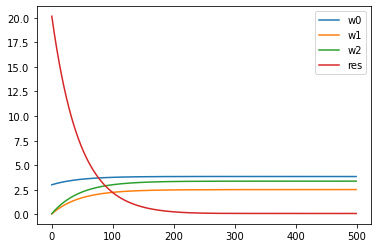

In [ ]:
resdf.plot()